# Анализ и проверка гипотез по данным личного аккаунта сети Untappd

Данный проект изначально был предназначен для тренировки и отработки навыков работы с python, pandas, jupyter notebook и со всеми теми знаниями, что я получал в процессе учёбы. К тому же было достаточно интересно, даже с обыкновенной описательной точки зрения, получить сводку цифр, связанных с собой, и постараться найти причины их локальных состояний.

Впоследствии появилась идея о том, что и этот "блокнот" может войти в моё портфолио. К тому же я продолжаю им пользоваться, обновляя данные, поэтому решение привести его в надлежащий вид я нахожу правильным.

### 18+

Немного информации. Untappd - социальная сеть для биргиков. Биргики - слово, легко разбивающееся на два безо всяких специально написанных функций. С развитием пивного бизнеса, его брендированием под "ремесло", его упрощением, приобретением навыков низкоалкогольного напитка, доступного, трендового и чуть менее вредного для молодёжи, "тапок", как его ласково называют путешественники по барам, оказался как нельзя кстати. Он помогает: напиткам - продаваться, барам - развиваться, людям - коммуницировать, моде - быть самой собой. 

Минздрав, конечно, будет против, но этот прожект останется без критического взгляда.

Потому что для моего интереса к статистическим сводкам, начавшегося с увлечения спортом, "тапок" оказался элементом игры в чекины. Иначе говоря, "набиванием статы". 

Так приятно смотреть на таблички.

Untappd содержит карточки пива и пивоварен, а также имеет профайлы баров и пользователей. С помощью него можно обнаружить пиво, прочитать его характеристики или же узнать, где оно продаётся. Но самое главное - его можно оценить.
Внесение оценки состоит из привычных действий: комментарии, фотографии, отметка места, оценки, тегированный вкусовой профиль, друзья, которые пробовали очередной сорт вместе с тобой, лайки, именуемые тостами.
В общем, ничего сложного в функционировании приложения нет.

Зато сколько после него статистики! 

Основная статистика доступна в приложении. Всегда можно посмотреть сводную таблицу по стилям или странам, например. Можно платить за небольшую месячную подписку, с которой получать чуть больший функционал, в том числе и аккуратные временные графики. 

А можно и сделать запрос на всю-всю-всю сборку твоих действий. Он-то и будет нашим датасетом.

#### Задачи и направления

В данном прожекте основой будет описательная статистика, за которой я продолжаю наблюдать и которая может неким образом охарактеризовать меня. Это и можно назвать целью.

Также будут построены графики для наглядности и тренировки с их функционалом. Кроме того, в прожекте блок будет отдан на откуп попытки проверки статистических гипотез.

Получится или нет? Очень скоро узнаем.

А теперь к делу!

In [1]:
#import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from scipy import stats
%matplotlib inline

In [2]:
#open dataset

checkins = pd.read_csv('beer_november_second.csv')

## 1. Обзор датасета.

"Откроем" датасет, посмотрим на данные, которые в нём хранятся, посмотрим на его форму и выведем первые/последние записи.

In [3]:
checkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5331 entries, 0 to 5330
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_name                     5331 non-null   object 
 1   brewery_name                  5331 non-null   object 
 2   beer_type                     5331 non-null   object 
 3   beer_abv                      5331 non-null   float64
 4   beer_ibu                      5331 non-null   int64  
 5   comment                       5222 non-null   object 
 6   venue_name                    5085 non-null   object 
 7   venue_city                    4673 non-null   object 
 8   venue_state                   5037 non-null   object 
 9   venue_country                 5085 non-null   object 
 10  venue_lat                     5085 non-null   float64
 11  venue_lng                     5085 non-null   float64
 12  rating_score                  5271 non-null   float64
 13  cre

In [4]:
#многовато сортов даже за шесть лет

checkins.shape

(5331, 32)

In [5]:
checkins.head()

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
0,Hentai,AF Brew,IPA - American,5.9,50,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,Bottle,194363403,678907,38368,NaN,3.72,3.72,NaN,0,0
1,HopHead Double IPA,AF Brew,IPA - Imperial / Double,8.5,140,NaN,NaN,NaN,NaN,NaN,...,NaN,194363542,836456,38368,NaN,4.22,3.96,NaN,0,0
2,Chimay Grande Réserve (Blue),Bières de Chimay,Belgian Strong Dark Ale,9.0,35,NaN,NaN,NaN,NaN,NaN,...,NaN,194363634,34039,378,NaN,3.92,3.92,NaN,1,0
3,Chocolate Stout,Knightberg,Stout - Other,5.0,17,NaN,NaN,NaN,NaN,NaN,...,NaN,194363695,1105285,12920,NaN,3.77,3.76,NaN,0,0
4,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,Bottle,194363744,983516,82343,NaN,3.99,3.85,NaN,1,0


In [6]:
checkins.tail()

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
5326,SALTED FISSION BOMB,DOLPHINWOLF,Farmhouse Ale - Other,8.2,10,Если подвиги Геракла были совершены не в Чечне...,Spontan,СПБ,Санкт-Петербург,Россия,...,Draft,1097789284,4548806,487600,https://untappd.s3.amazonaws.com/photos/2021_1...,3.64,3.68,NaN,9,0
5327,Posh Premium Grape-Mandarin,Cider House,Mead - Melomel,5.5,0,"Вторник или среда или понедельник, вероятность...",Untappd at Home,NaN,Everywhere,United States,...,Bottle,1098169708,3654284,348857,https://untappd.s3.amazonaws.com/photos/2021_1...,3.51,3.56,NaN,10,0
5328,Sunbreaker,Stamm Brewing,Lager - IPL (India Pale Lager),4.5,0,Кажется вчера после этого отправился на заслуж...,Spontan,СПБ,Санкт-Петербург,Россия,...,Can,1098169817,4557498,44976,NaN,3.86,3.74,NaN,11,0
5329,Altvater Weißbierbock,Brauerei Bischofshof,Bock - Weizenbock,7.1,0,"Джениффер Лав Роддик, Джениффер Лав Сафин, Дже...",Untappd at Home,NaN,Everywhere,United States,...,Bottle,1098241582,1530197,6037,https://untappd.s3.amazonaws.com/photos/2021_1...,3.58,3.59,NaN,8,0
5330,Special De Ryck,Brouwerij De Ryck,Pale Ale - Belgian,5.5,0,"Мои внутренние органы такие же мерзкие, как и ...",Untappd at Home,NaN,Everywhere,United States,...,Bottle,1098251902,25291,3198,https://untappd.s3.amazonaws.com/photos/2021_1...,3.12,3.15,NaN,9,0


## 2. Форматирование некоторых данных, которое потребуется в работе

В этом разделе "складируются" некоторые фазы клининга, которые требуются для работы. В частности:

- форматируется время;
- удаляются дубликаты (неуникальное пиво и случайные повторы в таблице);
- удаляются строки с отсуствующей выставленной оценкой;
- переименовываются длинные названия в чекинах.

In [7]:
#перевод столбца в тип datetime

checkins['created_at'] = pd.to_datetime(checkins['created_at'])

In [8]:
#определение дней недели

checkins['weekdays'] = checkins['created_at'].dt.dayofweek
checkins['weekdays'].value_counts()

4    1161
5     922
3     736
2     665
0     649
6     608
1     590
Name: weekdays, dtype: int64

In [9]:
#переименование длинных наименований

checkins = checkins.replace({'Остановка «Светлановский просп. / просп. Тореза»':'Ост. «Светлановский/Тореза»'})

In [10]:
#удаление дублированных чекинов (сорта, которые я пробовал несколько раз)
che = checkins.copy()
che[che.duplicated(subset = ['beer_name', 'brewery_name', 'beer_abv'])]

che[che['beer_name'] == 'Urizen']

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments,weekdays
4,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,194363744,983516,82343,NaN,3.99,3.85,NaN,1,0,4
72,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,Разлив в марте пятняшки. Теперь полностью из х...,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,264434131,983516,82343,https://untappd.s3.amazonaws.com/photo/2016_01...,3.99,3.85,NaN,1,0,3
2672,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,Бутылка от марта 2015. На этот раз от хрена ни...,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,829473732,983516,82343,NaN,3.99,3.85,NaN,13,0,4


In [11]:
checkins_drop = che.drop_duplicates(subset = ['beer_name', 'brewery_name', 'beer_abv'])
checkins_drop[checkins_drop['beer_name'] == 'Urizen']

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments,weekdays
4,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,194363744,983516,82343,NaN,3.99,3.85,NaN,1,0,4


In [12]:
#копия датасета с удалёнными строками, в которых отсутствовала оценка

checkins_drop_notnan = checkins_drop.copy()
checkins_drop_notnan = checkins_drop_notnan.dropna(subset = ['rating_score'])

## 3. Описательная статистика

Раздел, ради которого всё затевалось. В нём будут синтезированы некоторые интересующие меня показатели, которые раскрывают палитру интересов к пивному напитку.

Будут описаны следующие показетели (колонки датасета):

- **rating_score** - персональные оценки
- **global_weighted_rating_score** - взвешенные средние оценки пользователей для попробованного сорта
- **beer_type** - стили пива
- **brewery_name** - наименование пивоварни
- **brewery_country** - страна, которой пивоварня принадлежит
- **total_toasts** - количество лайков за чекин пива
- **venue_name** - название места, где пиво было попробовано
- **tagged_friends** - люди, которые пробовали сорт вместе со мной
- **comments** - персональный текст, которым был описан сорт

#### #Ключевые показатели распределения оценок

In [14]:
#ключевые показатели персональных оценок 

checkins['rating_score'].describe()

count    5271.000000
mean        3.644565
std         0.424574
min         0.500000
25%         3.500000
50%         3.750000
75%         3.900000
max         5.000000
Name: rating_score, dtype: float64

In [15]:
#ключевые показатели взвешенных средних оценок пользователей

checkins['global_weighted_rating_score'].describe()

count    5331.000000
mean        3.714500
std         0.285724
min         0.840000
25%         3.610000
50%         3.750000
75%         3.890000
max         4.570000
Name: global_weighted_rating_score, dtype: float64

#### #Гайд по стилям пива

Для меня основным статистическим и дегустационным параметром являются стили пива. Безусловно, стиль - глава "большого крафтового города", ответственный за разнообразие. В этот же момент, разнообразие - глава "большого крафтового государства", ответственный за интерес к потреблению. 

Отсутствие разницы между стилями убило бы весь интерес. А так как пивной продукт, как и всё в жизни, подвержен эволюции, то убийства не происходит. 

In [16]:
#стили пива, их распределение по количеству и средним персональным/взвешенным средним общим оценкам (не менее 10 чекинов на стиль)

checkins['beer_type'].value_counts()

IPA - American                      282
Sour - Other Gose                   258
Sour - Fruited                      225
IPA - New England / Hazy            215
Sour - Fruited Gose                 197
                                   ... 
Mild - Dark                           1
Farmhouse Ale - Bière de Coupage      1
Rye Wine                              1
Lager - Red                           1
Kentucky Common                       1
Name: beer_type, Length: 223, dtype: int64

In [17]:
#стили пива, в которых у меня попробовано менее 10 сортов

checkins_drop['beer_type'].value_counts()[checkins_drop['beer_type'].value_counts() < 10]

Winter Warmer                       9
Extra Special / Strong Bitter       9
IPA - Red                           9
Stout - Coffee                      9
Mead - Cyser                        9
                                   ..
Mild - Dark                         1
Farmhouse Ale - Bière de Coupage    1
Rye Wine                            1
Lager - Red                         1
Kentucky Common                     1
Name: beer_type, Length: 105, dtype: int64

In [18]:
#лучшие стили пива по моей оценке (попробовано не менее 10 сортов)

avg_beer_type = checkins_drop.groupby('beer_type')['rating_score']
avg_beer_type.mean()[(avg_beer_type.size() >= 10)].sort_values(axis=0, ascending=False)

beer_type
Freeze-Distilled Beer               4.075000
Lambic - Gueuze                     4.071739
Stout - Imperial / Double Coffee    4.028571
Lambic - Fruit                      4.018182
Chilli / Chile Beer                 3.921739
                                      ...   
Kellerbier / Zwickelbier            3.067857
Lager - American                    3.067857
Pilsner - Other                     3.042105
Non-Alcoholic Beer                  2.948485
Lager - Pale                        2.872527
Name: rating_score, Length: 118, dtype: float64

In [19]:
#лучшие стили пива, присутвующие в датасете, по средне взвещанной мировой оценке (попробовано не менее 10 сортов)

global_avg_beer_type = checkins_drop.groupby('beer_type')['global_weighted_rating_score']
global_avg_beer_type.mean()[(global_avg_beer_type.size() >= 10)].sort_values(axis=0, ascending=False)

beer_type
Stout - Imperial / Double Coffee    4.140000
Stout - Imperial / Double Pastry    4.026154
Lambic - Framboise                  4.013636
Sour - Smoothie / Pastry            4.006406
IPA - Triple New England / Hazy     4.001714
                                      ...   
Kellerbier / Zwickelbier            3.232857
Lager - American Light              3.197273
Lager - Pale                        3.138901
Lager - American                    3.118571
Non-Alcoholic Beer                  2.952647
Name: global_weighted_rating_score, Length: 118, dtype: float64

#### #Гайд по странам

Как мы узнавали географию по футболу и иным видам спорта, так сейчас в сознании созданы слоты для географии пивной. В настоящем подразделе, аналогично предыдущему, содержаться наиболее часто зачекиненные государства-производители со средней оценкой.

In [64]:
#страны, чьё производство я пробовал

checkins['brewery_country'].value_counts().head(10)

Russia           3177
United States     356
Belgium           287
Germany           221
England           142
Netherlands       122
Estonia           105
Denmark            95
Spain              92
Scotland           91
Name: brewery_country, dtype: int64

In [21]:
#лучшие государства-производители пива по моей оценке (попробовано не менее 20 сортов)

avg_country_score = checkins_drop.groupby('brewery_country')['rating_score']
avg_country_score.mean()[(avg_country_score.size() >= 20)].sort_values(axis=0, ascending=False)

brewery_country
Norway            3.812025
United States     3.797994
Belgium           3.777509
Sweden            3.752874
Italy             3.743966
Denmark           3.727473
Netherlands       3.690417
Russia            3.649599
Spain             3.646739
Scotland          3.646512
Estonia           3.631443
Belarus           3.606452
France            3.556250
England           3.530216
Finland           3.504444
Germany           3.360233
Ireland           3.322500
Poland            3.314583
Czech Republic    3.283000
Lithuania         3.165278
Latvia            3.129412
Name: rating_score, dtype: float64

In [22]:
#лучшие государства-производители пива из присутствующих в датасете, по средней взвешенной мировой оценке (попробовано не менее 20 сортов)

avg_country_global_score = checkins_drop.groupby('brewery_country')['global_weighted_rating_score']
avg_country_global_score.mean()[(avg_country_global_score.size() >= 20)].sort_values(axis=0, ascending=False)

brewery_country
United States     3.809290
Belarus           3.799516
Russia            3.777436
Norway            3.761125
Sweden            3.728182
Belgium           3.695000
Spain             3.692065
Italy             3.662542
Denmark           3.657234
Netherlands       3.637787
France            3.623333
Scotland          3.611798
Estonia           3.602981
England           3.589149
Ireland           3.571818
Poland            3.398148
Germany           3.393917
Czech Republic    3.369200
Finland           3.322889
Latvia            3.308824
Lithuania         3.226389
Name: global_weighted_rating_score, dtype: float64

In [23]:
#соединим таблицы в один датасет

countries_mine = avg_country_score.mean()[(avg_country_score.size() >= 20)]
countries_global = avg_country_global_score.mean()[(avg_country_global_score.size() >= 20)]
avg_countries_scores = pd.merge(left=countries_mine, right=countries_global, on='brewery_country')

In [24]:
# найдём разницу между выставляемыми мной оценками и между оценками, которые ставят в целом

avg_countries_scores['difference'] = avg_countries_scores.rating_score - avg_countries_scores.global_weighted_rating_score
avg_countries_scores.head()

,rating_score,global_weighted_rating_score,difference
brewery_country,,,
Belarus,3.606452,3.799516,-0.193065
Belgium,3.777509,3.695000,0.082509
Czech Republic,3.283000,3.369200,-0.086200
Denmark,3.727473,3.657234,0.070238
England,3.530216,3.589149,-0.058933


In [25]:
#отсортируем и посмотрим за восхвалением и предвзятостью

avg_countries_scores.difference.sort_values(ascending=False)

brewery_country
Finland           0.181556
Belgium           0.082509
Italy             0.081423
Denmark           0.070238
Netherlands       0.052630
Norway            0.050900
Scotland          0.034714
Estonia           0.028463
Sweden            0.024692
United States    -0.011296
Germany          -0.033684
Spain            -0.045326
England          -0.058933
Lithuania        -0.061111
France           -0.067083
Poland           -0.083565
Czech Republic   -0.086200
Russia           -0.127837
Latvia           -0.179412
Belarus          -0.193065
Ireland          -0.249318
Name: difference, dtype: float64

#### #Гайд по пивоварням

Конечно же нельзя обойти стороной и пивоварни - напрямую ответственные за результат и за восприятие. Углубляться не будем, посмотрим только количество потреблённых сортов и средние оценки. 

In [66]:
#пивоварни, чьё производство я пробовал

checkins_drop['brewery_name'].value_counts().head(15)

AF Brew                189
Salden's Brewery       171
Zagovor Brewery        147
Bakunin Brewing Co.    146
Big Village Brewery    144
Stamm Brewing          102
Red Button Brewery      75
DIETA / ДИЕТА           73
Wild Lab                68
BrewDog                 61
Hophead Brewery         61
Jaws Brewery            60
OSTROVICA               57
Selfmade Brewery        55
4BREWERS                52
Name: brewery_name, dtype: int64

In [27]:
#лучшие пивоварни по моим оценкам (зачекинено не менее 20 сортов)

avg_brewery_score = checkins_drop_notnan.groupby('brewery_name')['rating_score']
avg_brewery_score.mean()[(avg_brewery_score.size() >= 20)].sort_values(axis=0, ascending=False).head(20)

brewery_name
Brouwerij Alvinne                  4.001923
Evil Twin Brewing                  3.942593
DIETA / ДИЕТА                      3.939041
Brouwerij Kees                     3.908333
Midnight Project                   3.864286
Plague Brew                        3.856061
Stamm Brewing                      3.824510
Founders Brewing Co.               3.821875
Red Rocket Brewery                 3.808000
To Øl                              3.801724
Big Village Brewery                3.799653
Oka River                          3.797917
Nøgne Ø                            3.797619
Zagovor Brewery                    3.793197
Wild Lab                           3.792647
Brewlok Brewery                    3.783333
Brouwerij de Molen                 3.782927
Anderson Valley Brewing Company    3.780357
Snowcap Brewing                    3.777273
Omnipollo                          3.767241
Name: rating_score, dtype: float64

 #### #Немного о лагерах и пилзнерах

Для интереса приведём ещё некоторую описательную статистику, которая могла бы порадовать любого биргика. Затронем лагера, пилзнеры и пшеничку, как элемент "чистоты" среди многочисленных экспериментов.

Определим страны и пивоварни, кто лучше всех может почувствовать "классику". Опять же, всё на взгляд автора.

In [28]:
#распределение оценок для классики
lag_pils = checkins_drop[checkins_drop['beer_type'].str.contains('Lager|Pilsner|Hefeweizen')]
lag_pils['rating_score'].value_counts(bins=8, normalize=True)*100

(3.188, 3.625]    34.168565
(2.75, 3.188]     23.006834
(3.625, 4.062]    18.223235
(2.312, 2.75]     13.667426
(1.875, 2.312]     6.150342
(4.062, 4.5]       2.277904
(1.438, 1.875]     0.911162
(0.995, 1.438]     0.683371
Name: rating_score, dtype: float64

In [29]:
#лучшие пивоварни, способные варить "классику" (не менее 4 чекинов на пивоварню)

brewery_lager_score = lag_pils.groupby('brewery_name')['rating_score']
brewery_lager_score.mean(True)[(brewery_lager_score.size() >= 4)].sort_values(axis=0, ascending=False)

brewery_name
Пивоварня Одна тонна / Odna Tonna Brewery                    4.070000
Пивная Диета (Beer Diet)                                     3.940000
Velka Morava                                                 3.804545
Stamm Brewing                                                3.692857
AF Brew                                                      3.675000
Ayinger Privatbrauerei                                       3.600000
OSTROVICA                                                    3.575000
Salden's Brewery                                             3.566667
Jaws Brewery                                                 3.510000
Kulmbacher Brauerei                                          3.260000
Tradiční pivovar v Rakovníku                                 3.187500
Buket Chuvashii (Букет Чувашии)                              3.183333
Privatbrauerei Eichbaum                                      3.033333
Moscow Brewing Company (Московская Пивоваренная Компания)    3.016667
Cēsu Al

In [30]:
#лучшие страны, чьи пивоварни способны варить "классику" (не менее 10 чекинов на пивоварню)

country_lager_score = lag_pils.groupby('brewery_country')['rating_score']
country_lager_score.mean()[(country_lager_score.size() >= 10)].sort_values(axis=0, ascending=False)

brewery_country
United States     3.452632
Russia            3.303869
Germany           3.200000
Czech Republic    3.146296
Lithuania         3.046429
Latvia            2.809091
Name: rating_score, dtype: float64

#### #Пройдёмся по заведениям

Безусловно, интерес могут представлять и заведения. Конечно, статистика оценок в заведении не может являться фактором, определяющим решение о посещении. Тем не менее, в некоторых из них оценки выставляются лучше. 

Оговоримся, что описательная статистика не выявляет причины. И можно лишь догадываться, был ли бармен настолько хорош, что мне понравилось всё, что мы с ним попробовали. 

Посмотрим на средние персональные, средние взвешенные общие, а также дополнительно выясним, в каком баре я оставляю самые длинные комментарии в чекинах. Здесь причина более очевидна - при бармене и друзьях написать длинный комментарий невозможно.

In [31]:
#средние персональные оценки пиву в заведениях (не менее 20 чекинов в заведении)

avg_venue_score = checkins_drop.groupby('venue_name')['rating_score']
avg_venue_score.mean()[(avg_venue_score.size() >= 20)].sort_values(axis=0, ascending=False).head(20)

venue_name
AF Brew Taproom                    3.893333
Avrora Bar                         3.881818
TOP HOPS                           3.850746
Лободэй 2021                       3.820000
Beer Diet (Пивная Диета)           3.818009
Old Skull Fest                     3.811957
Баланс белого                      3.801220
Share House                        3.797222
Spontan                            3.793162
RULE taproom                       3.791892
Beergeek Craft Beer Bar & Store    3.790190
Redrum Bar                         3.787705
St.Petersburg Craft Event          3.762121
Fillin'Good                        3.757172
Big Craft Day 2019 у моря          3.750538
Jawsspot                           3.736242
Breaking Bad Beer Cafe             3.728261
Bottle Expert                      3.718000
Beer Addicts                       3.714815
Ward № 6 (Палата № 6)              3.703302
Name: rating_score, dtype: float64

In [32]:
#средние взвешенные общие оценки пиву в заведениях (не менее 20 чекинов в заведении)

avg_venue_score = checkins_drop.groupby('venue_name')['global_weighted_rating_score']
avg_venue_score.mean()[(avg_venue_score.size() >= 20)].sort_values(axis=0, ascending=False).head(20)

venue_name
Avrora Bar                         3.945682
AF Brew Taproom                    3.926222
TOP HOPS                           3.880896
Beer Diet (Пивная Диета)           3.876825
Big Craft Day 2019 у моря          3.859032
Лободэй 2021                       3.851692
Beer Addicts                       3.842073
Spontan                            3.837187
Bottle Expert                      3.817600
Viderzhka                          3.816923
Redrum Bar                         3.813197
RULE taproom                       3.807027
Share House                        3.803519
Fillin'Good                        3.801878
Beergeek Craft Beer Bar & Store    3.798889
Jawsspot                           3.794768
St.Petersburg Craft Event          3.789118
Breaking Bad Beer Cafe             3.775000
KIOSK                              3.760133
Craft Republic                     3.752500
Name: global_weighted_rating_score, dtype: float64

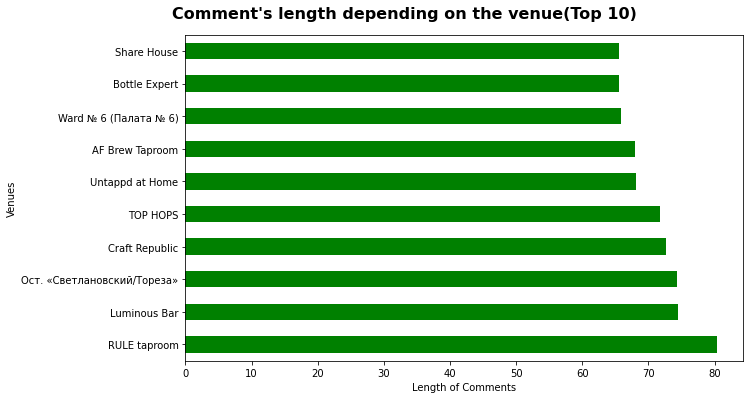

In [33]:
#места, в которых пишу самые длинные комментарии (учитываются все чекины; количество чекинов на бар больше 15)

checkins['comment_lenght'] = checkins['comment'].str.len()

avg_venue_ch_len = checkins.groupby('venue_name')['comment_lenght']
comment_hist = avg_venue_ch_len.mean()[(avg_venue_ch_len.size() >= 15)].sort_values(axis=0, ascending=False).head(10)

comment_hist.plot(kind = 'barh', figsize=[10,6], color = 'green')
plt.xlabel('Length of Comments')
plt.ylabel('Venues')
plt.text(x = -2, y= 10, s="Comment's length depending on the venue(Top 10)", size = 16, weight='bold')
plt.show()

#### #Сколько мне ещё хочется зачекинить

Этот счётчик добавлен вне системы. При помощи него я вижу, сколько чекинов ещё хотел бы сделать.

Последним и главным интересом для меня обладает желание попробовать не менее десяти сортов для каждого стиля. Желание граничит на границе искусственного и знакового. С одной стороны, это просто вымысел, последняя привязка для того, чтобы закончить с хобби "набивания статистики на вредных привычках", с другой - возможность увереннее себя чувствовать в спорах, обладая "знанием", ориентированным на кругозор. В общем-то, все интересы существуют только для того, чтобы кругозор был необъятен.

In [77]:
#сколько не хватает сортов для того, чтобы каждый стиль был попробован не менее 10 раз (quan = 2 отсутствующих стиля, умноженные на 10 проб)

style_dict = checkins['beer_type'].value_counts().to_dict()
quan = 20

for each in style_dict:
    if style_dict[each] < 10:
        d = 10 - style_dict[each]
        quan += d

print('I need to check ' + str(quan) + ' beers')

I need to check 559 beers


In [72]:
style_dict

{'IPA - American': 282,
 'Sour - Other Gose': 258,
 'Sour - Fruited': 225,
 'IPA - New England / Hazy': 215,
 'Sour - Fruited Gose': 197,
 'IPA - Imperial / Double': 186,
 'IPA - Imperial / Double New England / Hazy': 174,
 'Stout - Russian Imperial': 119,
 'Sour - Other': 118,
 'Farmhouse Ale - Saison': 117,
 'Pale Ale - American': 114,
 'Stout - Imperial / Double': 109,
 'Lager - Pale': 93,
 'Sour - Fruited Berliner Weisse': 80,
 'Wheat Beer - Hefeweizen': 73,
 'Sour - Smoothie / Pastry': 64,
 'IPA - Session': 63,
 'Spiced / Herbed Beer': 58,
 'Fruit Beer': 57,
 'Stout - Imperial / Double Pastry': 52,
 'Stout - Imperial / Double Milk': 52,
 'Lager - Helles': 51,
 'Stout - Milk / Sweet': 50,
 'IPA - Milkshake': 47,
 'Wheat Beer - Witbier / Blanche': 46,
 'IPA - Sour': 45,
 'Pilsner - Czech': 44,
 'Mead - Melomel': 43,
 'Porter - Imperial / Double': 42,
 'IPA - International': 42,
 'Kvass': 42,
 'Pale Ale - New England / Hazy': 41,
 'Barleywine - Other': 41,
 'Pilsner - Other': 38,
 'I

#### #Гайд по временным промежуткам

Конечно же, как можно обойти стороной зависимость чекинов от времени! Эти закономерности - одни из самых востребованных в анализе любого процесса. 

Очень легко понять, где на графике пятница, а где отпуск. Если бы фестивали не проводились так часто и были бы строго по графику, заметили бы и их.

Вычислим самые активные года, месяца, дни, а также посмотрим, есть ли среди графиков зарождение параболы. В этом блоке учитываются все чекины, с учётом дублирующихся.

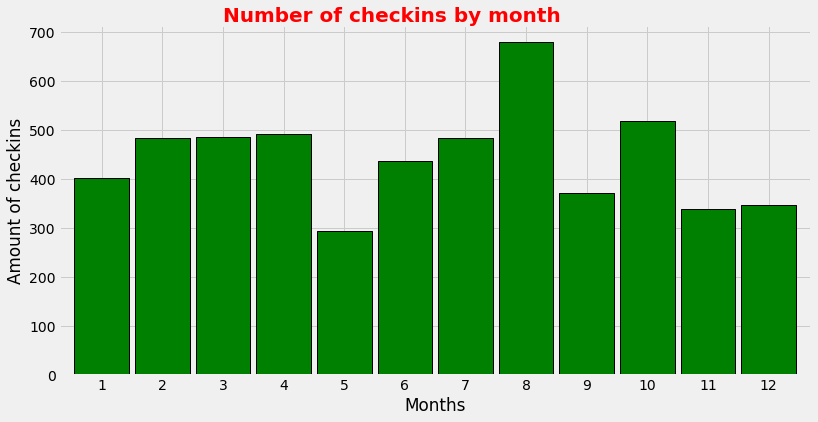

In [35]:
#количество чекинов за всё время, разбитое по месяцам

checkins['check_month'] = checkins['created_at'].dt.month
style.use('fivethirtyeight')
checkins['check_month'].value_counts().sort_index().plot(kind='bar', figsize=[12,6], width=0.9, color = 'green', edgecolor='black', linewidth=1)
plt.xlabel('Months')
plt.ylabel('Amount of cheсkins')
plt.xticks(rotation=360)
plt.text(x = 2, y= 720, s="Number of checkins by month", size = 20, weight='bold', color='red')
plt.show()

In [36]:
#количество чекинов, разбитое по годам
checkins['check_year'] = checkins['created_at'].dt.year
checkins['check_year'].value_counts()

2020    1470
2019    1397
2021    1008
2017     584
2018     457
2016     349
2015      66
Name: check_year, dtype: int64

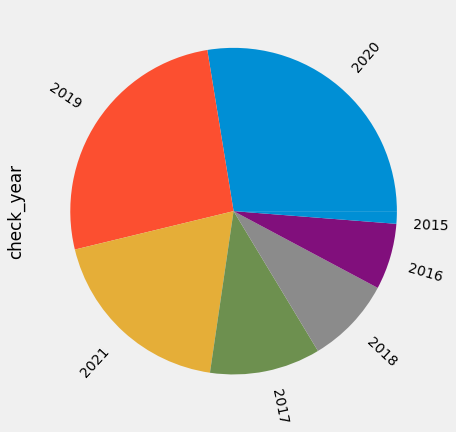

In [37]:
checkins['check_year'].value_counts().plot(kind='pie', figsize=[12,7], rotatelabels=True)

plt.show()

In [38]:
#распределение чекинов по дням за 2021 год

checkins[checkins['check_year'] == 2021]['weekdays'].value_counts()

4    316
5    232
6    110
3     93
1     88
2     85
0     84
Name: weekdays, dtype: int64

<AxesSubplot:xlabel='weekdays', ylabel='rating_score'>

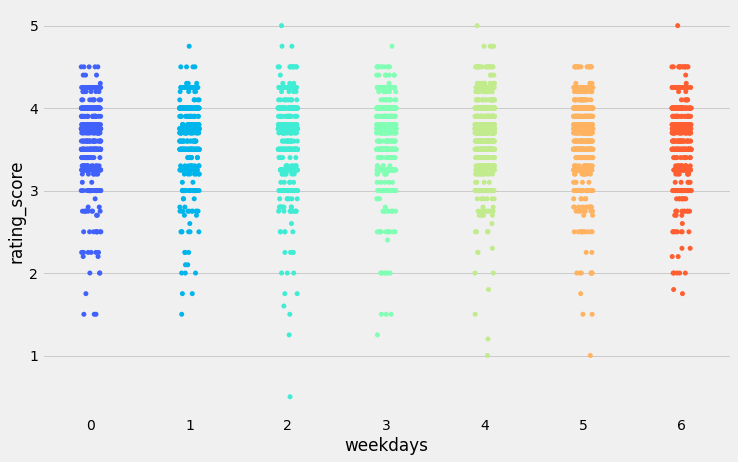

In [39]:
#оценки чекинов по дням за 2021 год

plt.figure(figsize=(11, 7)), 
sns.stripplot(x='weekdays', y='rating_score',data=checkins, palette='rainbow')

<AxesSubplot:xlabel='check_year', ylabel='serving_type'>

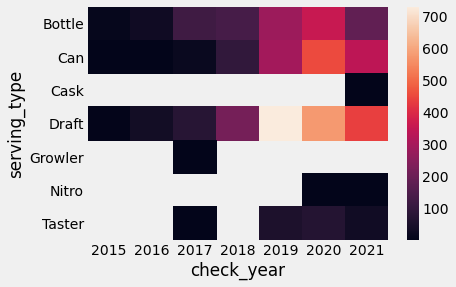

In [40]:
#тепловая карта для разных типов потребления

heatdata_serving = pd.pivot_table(checkins, values='beer_name', index='serving_type', columns='check_year', aggfunc='count')
sns.heatmap(heatdata_serving)

<AxesSubplot:xlabel='check_month', ylabel='check_year'>

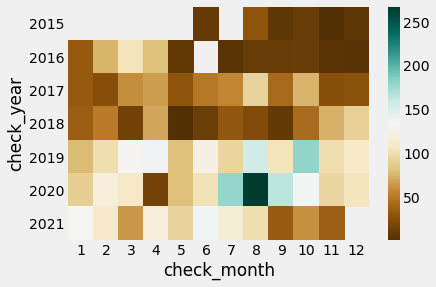

In [41]:
#тепловая карта для чекинов по годам и месяцам (отлично видны фестивали)

heatdata_serving = pd.pivot_table(checkins, values='beer_name', index='check_year', columns='check_month', aggfunc='count')
sns.heatmap(heatdata_serving, cmap='BrBG')

In [42]:
#создаём сводную табличку количества чекинов по времени в зависимости от дня недели

checkins['check_hour'] = checkins['created_at'].dt.hour
ppop = pd.pivot_table(checkins, values='beer_name', index='weekdays', columns='check_hour', aggfunc='count')
ppop

check_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekdays,,,,,,,,,,,,,,,,,,,,,
0,11.0,2.0,1.0,NaN,1.0,NaN,NaN,4.0,20.0,1.0,...,16.0,33.0,56.0,111.0,130.0,77.0,60.0,38.0,38.0,12.0
1,10.0,5.0,6.0,2.0,6.0,1.0,NaN,9.0,4.0,3.0,...,4.0,17.0,51.0,83.0,104.0,82.0,62.0,64.0,41.0,23.0
2,21.0,10.0,1.0,9.0,5.0,NaN,NaN,4.0,4.0,12.0,...,11.0,24.0,55.0,83.0,97.0,92.0,59.0,48.0,56.0,36.0
3,19.0,1.0,2.0,5.0,NaN,NaN,NaN,5.0,10.0,7.0,...,22.0,46.0,55.0,98.0,129.0,107.0,68.0,47.0,43.0,44.0
4,20.0,4.0,NaN,1.0,1.0,NaN,1.0,18.0,11.0,2.0,...,17.0,48.0,137.0,151.0,142.0,146.0,152.0,128.0,84.0,70.0
5,58.0,26.0,18.0,1.0,1.0,NaN,1.0,4.0,2.0,23.0,...,48.0,66.0,76.0,100.0,79.0,68.0,81.0,60.0,70.0,45.0
6,35.0,29.0,10.0,10.0,10.0,NaN,NaN,3.0,21.0,35.0,...,25.0,25.0,34.0,47.0,53.0,48.0,44.0,28.0,21.0,17.0


In [43]:
# импортируем код со stackoverflow.com (нужно в нём когда-нибудь разобраться)

import matplotlib.cm as cm
import matplotlib as mpl

def pie_heatmap(table, cmap=cm.gnuplot, vmin=None, vmax=None,inner_r=0.25, pie_args={}):
    n, m = table.shape
    vmin= table.min().min() if vmin is None else vmin
    vmax= table.max().max() if vmax is None else vmax

    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values], 
            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)

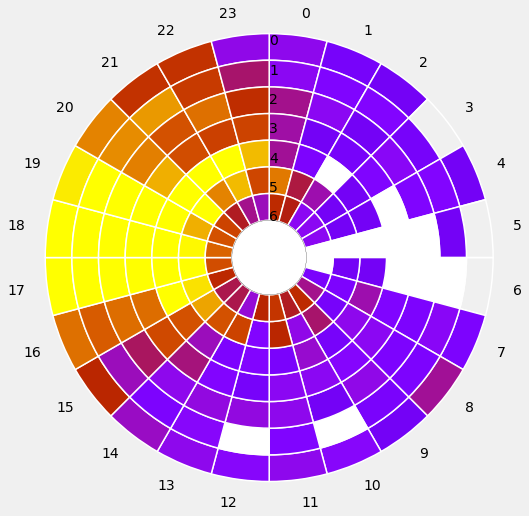

In [44]:
#строим тепловую карту в завимисости от времени потребления 

plt.figure(figsize=(8,8))
pie_heatmap(ppop, vmin=-20,vmax=80,inner_r=0.2)

plt.show()

In [45]:
#сколько дней требовалось на каждую тысячу чекинов

check = [0, 999, 1999, 2999, 3999, 4999]
days = []
for i in range(1,len(check)):
    x = check[i] - check[i-1]
    sum = checkins_drop.iloc[check[i]]['created_at'] - checkins_drop.iloc[check[i-1]]['created_at']
    sum = sum.days
    days.append(sum)

print(days)

[957, 510, 263, 241, 289]


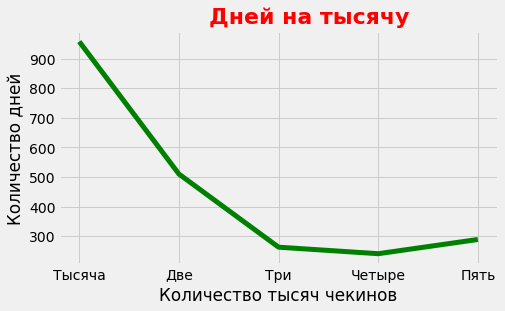

In [80]:
a = ["Тысяча", "Две", "Три", "Четыре", "Пять"]

plt.figure(figsize=[7,4])
plt.plot(a, days, color='green', linewidth = 5)
style.use('fivethirtyeight')
plt.xlabel("Количество тысяч чекинов")
plt.ylabel("Количество дней")
plt.text(x = 1.3, y= 1020, s="Дней на тысячу", size = 22, weight='bold', color='red')
plt.show()

#### #Немного о социализации

Или о тех, без кого этой статистики бы не было. Друзья, с которыми чаще всего разделяются чекины. Люди, из-за которых зачастую их так много.

Найдём только один показатель - количество вместе попробованного пива.

In [47]:
#люди, с которыми я попробовал больше всего сортов

notnull = checkins.copy()['tagged_friends'].dropna()
notnull.value_counts(dropna=False)

Jesse Gray                                                                               179
Petr M2FIVE                                                                               94
Jesse Gray,reijii Sakurai                                                                 52
Дядя Вася                                                                                 49
Viktor Shrek                                                                              35
                                                                                        ... 
Erkki Ammalainen,Andrey Andreev                                                            1
Jesse Gray,July  K,Дядя Вася                                                               1
Jesse Gray,Nikita Zheleznov,Alexander Kolchin,rOPbIHbI4                                    1
Kirill Burgardt,reijii Sakurai,Andrey Andreev,Eugene Acid,Jesse Gray,Erkki Ammalainen      1
July  K,Nof Nof                                                       

In [48]:
#оформляем всех друзей из чекинов в словарь, считаем количество уникальных значений

friends = notnull.apply(lambda x: x.split(',')).to_dict()
friends_count={}

for k,item in friends.items():
    for i in item:
        if i in friends_count:
            friends_count[i] += 1
        else:
            friends_count[i] = 1
print(friends_count)

{'Tatiana Karmanova': 4, 'Beer Addicts': 29, 'Darth Vader': 45, 'Eugene Acid': 61, 'Super Man': 5, 'SULYA': 46, 'July  K': 95, 'Jesse Gray': 449, 'Дядя Вася': 65, 'Petr M2FIVE': 127, 'Aleksey Shitikov': 3, "Alexandr O'Lenin": 6, 'Мухтар': 2, 'Nof Nof': 2, 'Jeki Admiral  Foweq': 11, 'Anna R': 19, 'Dima Solntsev': 7, 'Nikita Zheleznov': 62, 'Violletta P': 70, 'Hans Jerkov': 10, 'Егор Ющенко': 48, 'Pavel Lebowski': 12, 'Daniil Korolkov': 2, 'Ksenia': 33, 'rOPbIHbI4': 27, 'Alexander Kolchin': 5, 'Golovin Pavel': 3, 'Erkki Ammalainen': 20, 'Вениамин Вкуснямба': 1, 'reijii Sakurai': 121, 'Andrey Andreev': 52, 'Viktor Shrek': 43, 'Roman K': 5, 'Marat Settarov': 3, 'Kirill Tychuk': 8, 'Evgeny Kataev': 35, 'Kirill Burgardt': 14, 'Daniel Pertsovsky': 4, 'White Dwarf': 13, 'Sergey Solovyev': 2, 'O Sh': 2, 'Anton W.': 1, 'Max Dmitriev': 3, 'Niki Shmiki': 13, 'Jura Khil': 6, 'Любава Ефремова': 11, 'Kirill Polyak': 2, 'Aleksey Fadeenko': 1, 'Ivan Komarov': 3, 'Нина': 1, 'Karina Gorskova': 1, 'Viktor

In [49]:
#выбираем друзей, с которыми количество совместных чекинов превышает 50

friends_count_50 = {}

for k,i in friends_count.items():
    if i > 50:
        friends_count_50[k] = i
    
print(friends_count_50)

{'Eugene Acid': 61, 'July  K': 95, 'Jesse Gray': 449, 'Дядя Вася': 65, 'Petr M2FIVE': 127, 'Nikita Zheleznov': 62, 'Violletta P': 70, 'reijii Sakurai': 121, 'Andrey Andreev': 52}


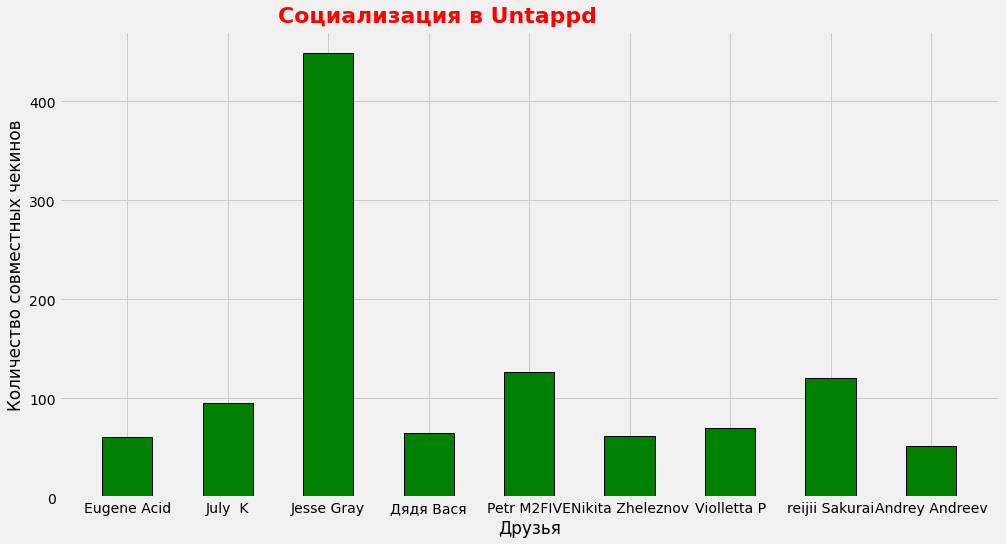

In [82]:
#строим график "социализации"

plt.figure(figsize=[15,8])
plt.bar(friends_count_50.keys(), friends_count_50.values(), width=0.5, color='green', edgecolor='black', linewidth=1)
style.use('fivethirtyeight')
plt.xlabel("Друзья")
plt.ylabel("Количество совместных чекинов")
plt.text(x = 1.5, y= 480, s="Социализация в Untappd", size = 22, weight='bold', color='red')
plt.show()

## 4.Заключение

Что можно вычленить из данного проекта?

Если рассматривать его серьёзно и для "потомков", то ничего.
Если смотреть на него "невооружённым глазом", то можно найти тренажёр, развлечение и попытку самоанализа. 

Можем ли мы оперировать имеющимися данными? Почему нет?

Например, увидеть куда движется крафтовая индустрия на примере большого количества "саур" и "смузи" сортов. Или же посмотреть, как ведёт себя человек увлечённый, как его втягивает в себя социальная сеть и очередной пример "маленького мира" в мире большом. 
И вообще, как и чем может быть инетересна такая наука, как статистика, и как красиво выглядят числа.

Особенно, когда их силуэт расплывается в отблеске пустого стекла.

## 5. Проверка статистических гипотез (в процессе)

В данном разделе проводится постепенная проверка собственных знаний и испытание действий по проверке статистических гипотез. На данный момент проведены: 

- ти-тест, в котором проверена гипотеза об однородности выставления оценок российским и американским сортам;
- anova, в котором рассмотрено влияние производителя на выставление оценки сорту пива.

Однако данные результаты являются лишь мгновенным применением имеющихся формул. В дальнейшем будет необходимо попробовать такие процессы, как проверка на нормальность, изменение объёма выборок, поправки Бонфирони и Тьюки, непараметрику для т-распределений.

In [51]:
#импорт

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal

### Критерий Стьюдента

Различаются ли между собой средние выборок генеральной совокупности всех оценок чекинов, если они сделаны для пива из разных (с некоторых точек зрения - "конкурирующих") стран.

H0 - средние значения для сортов из России и США не различаются;

alpha - уровень значимости - 0.05

In [188]:
#создаём выборки по 25 чекинов для российского и американского пива

data_usa = checkins_drop_notnan[checkins_drop_notnan['brewery_country'] == 'United States'].sample(25)
data_rus = checkins_drop_notnan[checkins_drop_notnan['brewery_country'] == 'Russia'].sample(25)
np.random.seed

<function RandomState.seed>

In [189]:
#проверяем значения, попавшие в выборки

data_usa['rating_score'].value_counts(dropna=False)

4.00    10
3.75     7
3.50     2
4.10     2
3.70     1
4.50     1
3.40     1
3.80     1
Name: rating_score, dtype: int64

In [190]:
data_rus['rating_score'].value_counts(dropna=False)

3.75    6
4.00    4
3.70    3
3.90    2
3.50    2
4.10    2
4.25    1
3.30    1
3.00    1
3.40    1
3.80    1
3.10    1
Name: rating_score, dtype: int64

In [191]:
#используем scipy.stats для вывода значения статистики и уровня значимости

stat, p = ttest_ind(data_usa['rating_score'], data_rus['rating_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.773, p=0.083


In [192]:
#решаем, принять или отклонить нулевую гипотезу

alpha = 0.05
if p > alpha:
	print('Распределения одинаковы (мы не можем отклонить H0)')
else:
	print('Распределения различаются (отклоняем H0)')

Распределения одинаковы (мы не можем отклонить H0)


Исходя из единичной проверки, видно, что оценки для российских и американских производителей не имеют принципиальных подходов к выставлению. 


### Дисперсионный анализ 

Очередь для дисперсионного анализа. Для него сделаем выборки из чекинов, отсортированных по пивоварням. В анализе будут участовать пять наиболее известных российских крафтовых пивоварен. 

Задание: Используя анализ однофакторной модели, проверим гипотезу о влиянии производителя на оценку качества продукции.

Н0 - средние каждой выборки не отличаются

alpha - уровень значимости - 0.05

In [193]:
#создаём выборки оценок для различных пивоварен (по 30 чекинов) 

data_af = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'AF Brew'].sample(20)
data_stamm = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'Stamm Brewing'].sample(20)
data_zagovor = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'Zagovor Brewery'].sample(20)
data_village = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'Big Village Brewery'].sample(20)
data_dieta = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'DIETA / ДИЕТА'].sample(20)
np.random.seed

<function RandomState.seed>

In [200]:
#считаем статистику и p_value

stats, p2 = f_oneway(data_af['global_weighted_rating_score'], data_stamm['global_weighted_rating_score'], data_zagovor['global_weighted_rating_score'], data_village['global_weighted_rating_score'], data_dieta['global_weighted_rating_score'])
print('Statistics=%.3f, p=%.3f' % (stats, p2))

Statistics=2.182, p=0.077


In [201]:
#решаем, принять или отклонить нулевую гипотезу

alpha = 0.05
if p2 > alpha:
	print('Распределения одинаковы (мы не можем отклонить H0)')
else:
	print('Распределения различаются (отклоняем H0)')

Распределения одинаковы (мы не можем отклонить H0)


Проверяем те же выборки при помощи непараметрического подхода - Критерия Краскелла-Уоллеса

In [202]:
stat, p = kruskal(data_af['global_weighted_rating_score'], data_stamm['global_weighted_rating_score'], data_zagovor['global_weighted_rating_score'], data_village['global_weighted_rating_score'], data_dieta['global_weighted_rating_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=8.068, p=0.089


In [203]:
#решаем, принять или отклонить нулевую гипотезу

alpha = 0.05
if p > alpha:
	print('Распределения одинаковы (мы не можем отклонить H0)')
else:
	print('Распределения различаются (отклоняем H0)')

Распределения одинаковы (мы не можем отклонить H0)


Так же, как однофакторный ANOVA, критерий Краскелла-Уоллеса при единичном сэмплировании не позволяет нам отклонить нулевую гипотезу, а следовательно в таком случае значимых отличий в оценках крафтового творчества ведущих российских пивоварен не обнаружено.

Однако эксперимент следует повторить на разных количествах оценок, попадающих в выборку, а также на различных выборках. Также следует научиться использовать такие инструменты, как поправка Бонфирони или критерий Тьюки.


### Корреляция и линейная регрессия

In [62]:
#проверяем наличие корреляции между двумя величинами - собственной оценкой сортов и оценкой сообщества

checkins_drop_notnan['rating_score'].corr(checkins_drop_notnan['global_weighted_rating_score'])

0.6127557032785672

#      Продолжение следует...